In [1]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(12345)

import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Simple first: 

In [8]:
import numpy as np

x_start = .10
x_end = 9.3

y_start = .250
y_end = 12.4

xd = np.arange(int(x_start)+1, int(x_end)+1, 1)
yd = np.arange(int(y_start)+1, int(y_end)+1, 1)

# Find line equation.
m = (y_end - y_start)/(x_end-x_start)
b = y_start - m*x_start

# Find list of x values for all grid intersections: 
x_i = (yd-b)/m
y_i = xd*m + b

x_val_of_grid_intersections = np.concatenate((xd,x_i,np.asarray([x_start,x_end])))
# np.append(x_val_of_grid_intersections,)
x_val_of_grid_intersections.sort()

y_val_of_grid_intersections = np.concatenate((yd,y_i,np.asarray([y_start,y_end])))
y_val_of_grid_intersections.sort()


print(y_val_of_grid_intersections.shape, x_val_of_grid_intersections.shape)

fig, ax = plt.subplots(1, 1, figsize = (14,7))
x_ticks = np.arange(int(x_start), int(x_end)+1, 1)
y_ticks = np.arange(int(y_start), int(y_end)+1, )
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.grid(which = 'both')
ax.plot(x_val_of_grid_intersections,y_val_of_grid_intersections, marker = "o")

# Now find the midpoints of all the lines: 
x_grid_indx = ((x_val_of_grid_intersections[:-1]+x_val_of_grid_intersections[1:])/2)
y_grid_indx = ((y_val_of_grid_intersections[:-1]+y_val_of_grid_intersections[1:])/2)

ax.plot(x_grid_indx,y_grid_indx, 'r+')

(23,) (23,)


In [9]:

xd = np.arange(int(x_start)+1, int(x_end)+1, 1)
yd = np.arange(int(y_start)+1, int(y_end)+1, 1)

fig, ax = plt.subplots(1, 1, figsize = (14,7))
x_ticks = np.arange(int(x_start), int(x_end)+1, 1)
y_ticks = np.arange(int(y_start), int(y_end)+1, )
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.grid(which = 'both', linewidth=5)
ax.plot(x_val_of_grid_intersections,y_val_of_grid_intersections, marker = "o")

# Now find the midpoints of all the lines: 
x_grid_indx = ((x_val_of_grid_intersections[:-1]+x_val_of_grid_intersections[1:])/2)
y_grid_indx = ((y_val_of_grid_intersections[:-1]+y_val_of_grid_intersections[1:])/2)

# ax.plot(x_grid_indx,y_grid_indx, 'r+')

# Now find the coordinates of the effected cells: 
x_grid_indx = x_grid_indx.astype("int")
y_grid_indx = y_grid_indx.astype("int")

# Now find the power that should be associated with that cell: 
mesh_width_x = 1
relative_power = (x_val_of_grid_intersections[1:]-x_val_of_grid_intersections[:-1])*10

# Now we want a imshow grid that aligns with the grid we have above: 
img = np.zeros((int(x_end)+1, int(y_end)+1), dtype=np.uint8)
img[x_grid_indx,y_grid_indx] = relative_power

cmap = ax.pcolormesh(img.T, alpha = .2,cmap='jet') 
fig.colorbar(cmap)

### Now generalize to a more realistic situation: 

In [2]:

def allocate_powers(start_coordinate = (.1,100e6), stop_coordinate = (.5,151e6), freq_BW_low = 0, freq_BW_hi = 1.2e9, freq_bins =200, 
                    time_spec_start = 0, time_slices = 20, time_per_slice = 54e-3 ): 
    
    # Start by making the grid in freq and time
    freq_per_bin = (freq_BW_hi - freq_BW_low)/freq_bins
    time_spec_stop = time_spec_start + time_slices*time_per_slice
    t_ticks = np.arange(time_spec_start, time_spec_stop+1*time_per_slice, time_per_slice)
    f_ticks = np.arange(freq_BW_low, freq_BW_hi+1*freq_per_bin, freq_per_bin)
    
    # Now we want to grab the ticks that are within the line: 
    time_start,freq_start = start_coordinate
    time_stop,freq_stop = stop_coordinate
    
    t_intercepts = t_ticks[(t_ticks > time_start) & (t_ticks < time_stop)]
    f_intercepts = f_ticks[(f_ticks > freq_start) & (f_ticks < freq_stop)]

    # Find line equation.
    m = (freq_stop - freq_start)/(time_stop-time_start)
    b = freq_start - m*time_start

    # Find list of x values for all grid intersections: 
    t_i = (f_intercepts-b)/m
    f_i = t_intercepts*m + b

    t_val_of_grid_intersections = np.concatenate((t_intercepts,t_i,np.asarray([time_start,time_stop])))
    t_val_of_grid_intersections.sort()

    f_val_of_grid_intersections = np.concatenate((f_intercepts,f_i,np.asarray([freq_start,freq_stop])))
    f_val_of_grid_intersections.sort()

    fig, ax = plt.subplots(1, 1, figsize = (14,7))
    ax.set_xticks(t_ticks)
    ax.set_yticks(f_ticks)
    ax.grid(which = 'both')
    ax.plot(t_val_of_grid_intersections,f_val_of_grid_intersections, marker = "o")

    # Now find the midpoints of all the lines: 
    t_grid_indx = ((t_val_of_grid_intersections[:-1]+t_val_of_grid_intersections[1:])/2)
    f_grid_indx = ((f_val_of_grid_intersections[:-1]+f_val_of_grid_intersections[1:])/2)

    ax.plot(t_grid_indx,f_grid_indx, 'r+')
    plt.show()
    # Now find the coordinates of the effected cells: 
    t_grid_indx = (t_grid_indx/time_per_slice).astype("int")
    f_grid_indx = (f_grid_indx/freq_per_bin).astype("int")

    print(t_grid_indx.shape, f_grid_indx.shape, )
    # Now find the power that should be associated with that cell: 
#     mesh_width_x = 1
    relative_power = (t_val_of_grid_intersections[1:]-t_val_of_grid_intersections[:-1])*100/time_per_slice
    print(t_grid_indx.shape, f_grid_indx.shape, relative_power.shape )
    # Now we want a imshow grid that aligns with the grid we have above: 
    print(t_ticks.shape, f_ticks.shape)
    img = np.zeros((t_ticks.shape[0]+1, f_ticks.shape[0]+1), dtype=np.uint8)
    img[t_grid_indx,f_grid_indx] = relative_power
    fig, ax = plt.subplots(1, 1, figsize = (14,7))
    cmap = ax.pcolormesh(img.T, alpha = .2,cmap='jet')
    ax.plot(t_val_of_grid_intersections/time_per_slice,f_val_of_grid_intersections/freq_per_bin, marker = "o")
    fig.colorbar(cmap)
    plt.show()

In [3]:
%matplotlib qt
allocate_powers()

(18,) (18,)
(18,) (18,) (18,)
(22,) (201,)


[1 2 1 2 3 2 3 4 3 4 5 6 5 6 7 6 7 8 7 8] [1 1 2 2 2 3 3 3 4 4 4 4 5 5 5 6 6 6 7 7]


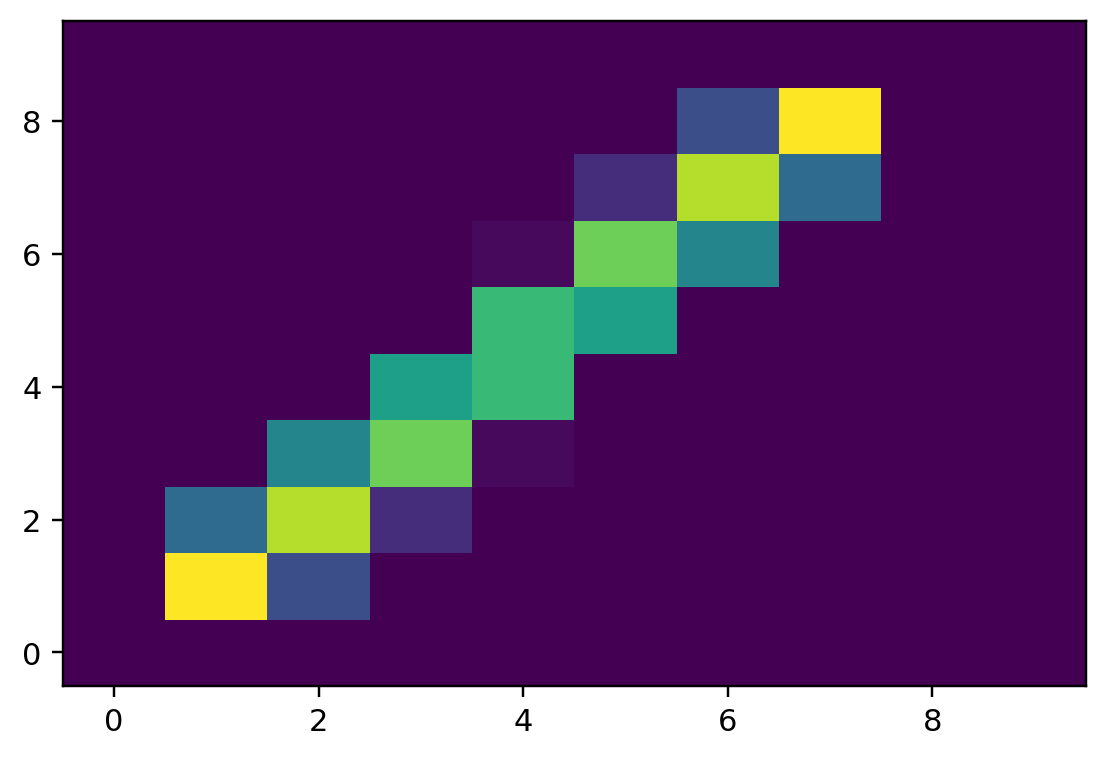

In [136]:
# This almost works. Or it's at least a good model for how to do this: 

from skimage.draw import line_aa
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc, val = line_aa(1, 1, 8, 7)
print(rr,cc)
img[rr, cc] = val*255 


plt.imshow(img, aspect='auto',origin='lower')